In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
from utils import constants as cnst
from wavelet import util, wav
from scipy.ndimage.measurements import label
from scipy import ndimage
from utils import u_arrays as ua
import numpy.ma as ma
from eod import mfg

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [72]:
msg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_-40_700km2_-50points_dominant_2004_09.nc'
msg_avg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_avgInter_MSG_-40_700km2_-50points_dominant_2004_09.nc'
mfg_file = '/home/ck/DIR/cornkle/data/vera_test/cores_MFG_-40_700km2_-50points_dominant_2004_09.nc'

In [114]:
ar_msg = xr.open_dataset(msg_file)
ar_avg_msg = xr.open_dataset(msg_avg_file) 
ar_mfg = xr.open_dataset(mfg_file)

In [115]:
ar_mfg = ar_mfg.isel(time=slice(0,1438))
ar_mfg

<xarray.Dataset>
Dimensions:         (lat: 296, lon: 674, time: 1438)
Coordinates:
  * lat             (lat) float64 3.912 3.957 4.003 4.048 ... 16.91 16.95 17.0
  * lon             (lon) float64 -17.68 -17.64 -17.59 ... 12.45 12.5 12.54
  * time            (time) datetime64[ns] 2004-09-01 ... 2004-09-30T22:30:00
Data variables:
    blobs           (time, lat, lon) int16 ...
    tir             (time, lat, lon) int16 ...
    power15-19km    (time, lat, lon) uint16 ...
    power32-38km    (time, lat, lon) uint16 ...
    power80-90km    (time, lat, lon) uint16 ...
    power160-170km  (time, lat, lon) uint16 ...
Attributes:
    radii:              [ 2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  ...
    scales_rounded:     [ 15  16  17  18  19  20  21  22  24  25  27  28  30 ...
    scales_original:    [ 15.          15.89194642  16.83693072  17.83810673 ...
    cutout_T:           -40
    core_minT:          -50
    cutout_minPixelNb:  28

In [116]:
ar_msg

<xarray.Dataset>
Dimensions:         (lat: 296, lon: 674, time: 1438)
Coordinates:
  * lat             (lat) float64 3.912 3.957 4.003 4.048 ... 16.91 16.95 17.0
  * lon             (lon) float64 -17.68 -17.64 -17.59 ... 12.45 12.5 12.54
  * time            (time) datetime64[ns] 2004-09-01 ... 2004-09-30T23:30:00
Data variables:
    blobs           (time, lat, lon) int16 ...
    tir             (time, lat, lon) int16 ...
    power15-19km    (time, lat, lon) uint16 ...
    power32-38km    (time, lat, lon) uint16 ...
    power80-90km    (time, lat, lon) uint16 ...
    power160-170km  (time, lat, lon) uint16 ...
Attributes:
    radii:              [ 2  2  2  2  2  3  3  3  3  3  3  3  3  4  4  4  4  ...
    scales_rounded:     [ 15  16  17  18  19  20  21  22  24  25  27  28  30 ...
    scales_original:    [ 15.          15.89194642  16.83693072  17.83810673 ...
    cutout_T:           -40
    core_minT:          -50
    cutout_minPixelNb:  28

In [110]:
tmsg = ar_msg['blobs']
tmsg_avg = ar_avg_msg['blobs']
tmfg = ar_mfg['blobs']

tmsg.values = (tmsg.values>=10) & (tmsg.values<=200)
tmsg_avg.values = (tmsg_avg.values>=10) & (tmsg_avg.values<=200)
tmfg.values = (tmfg.values>=10)& (tmfg.values<=200)

In [105]:
tmfg.values.max()

True

In [111]:
tmsg_hourly = tmsg.groupby('time.hour').sum()
tmsg_avg_hourly = tmsg_avg.groupby('time.hour').sum()
tmfg_hourly = tmfg.groupby('time.hour').sum()

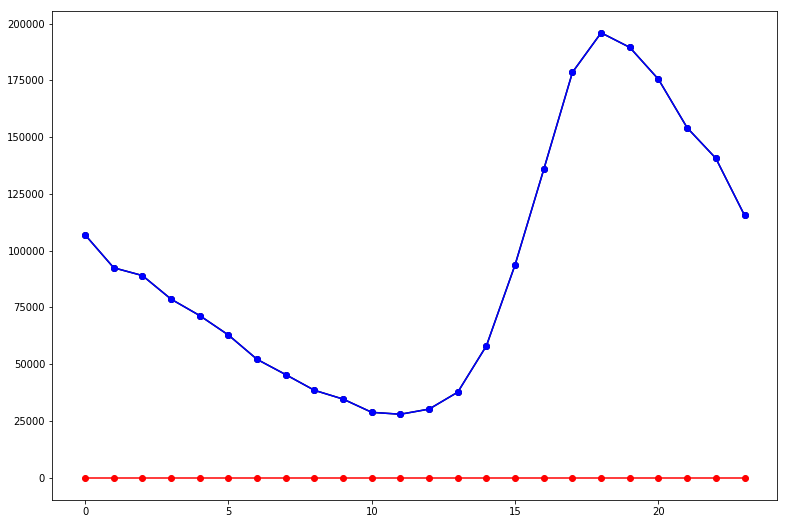

In [113]:
plt.figure(figsize=(13,9))
plt.plot(tmsg_hourly.hour, tmsg_hourly, '-o', color='k')
plt.plot(tmsg_avg_hourly.hour, tmsg_hourly, '-o', color='b')
plt.plot(tmfg_hourly.hour, tmfg_hourly, '-o', color='r')

(0, 20)

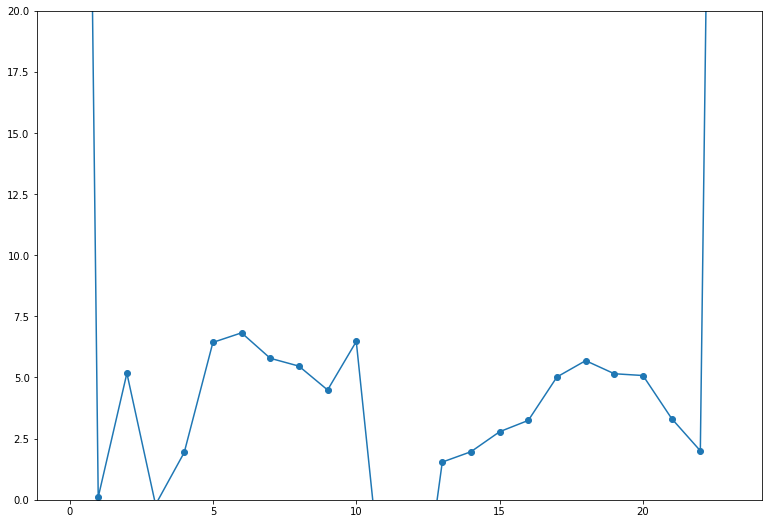

In [108]:
plt.figure(figsize=(13,9))
plt.plot(tmsg_hourly.hour, ((tmsg_hourly-tmfg_hourly)/tmsg_hourly)*100, '-o')
plt.ylim(0,20)